In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv('MIL_101_Cr_data.csv')
data.head()

,Nucleating agent,n_nucleat,n_GdmCl,v_H2O,temperature,Label
0,none,0.0,0,4.8,220,MIL-101
1,none,0.0,0,4.8,218,MIL-101
2,NaOH,1.0,0,5.0,220,MIL-101
3,none,0.0,0,5.0,200,MIL-101
4,none,0.0,0,5.0,180,MIL-101


In [7]:
data_encoded = pd.get_dummies(data, columns=['Nucleating agent'])
data_encoded = data_encoded.drop('Nucleating agent_none', axis=1)
X=data_encoded.drop(['Label'],axis=1)
y=data_encoded.loc[:,'Label']
y.head()
X.head()

,n_nucleat,n_GdmCl,v_H2O,temperature,Nucleating agent_NH4F,Nucleating agent_NaF,Nucleating agent_NaOH
0,0.0,0,4.8,220,False,False,False
1,0.0,0,4.8,218,False,False,False
2,1.0,0,5.0,220,False,False,True
3,0.0,0,5.0,200,False,False,False
4,0.0,0,5.0,180,False,False,False


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

knn_model = KNeighborsClassifier()  


param_grid = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)

y_predict_train = best_knn_model.predict(X_train)
y_predict_test = best_knn_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)

print("Best parameters found: ", best_params)
print("accuracy_train:", accuracy_train)
print("accuracy_test:", accuracy_test)



Best parameters found:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
accuracy_train: 0.8380952380952381
accuracy_test: 0.8148148148148148


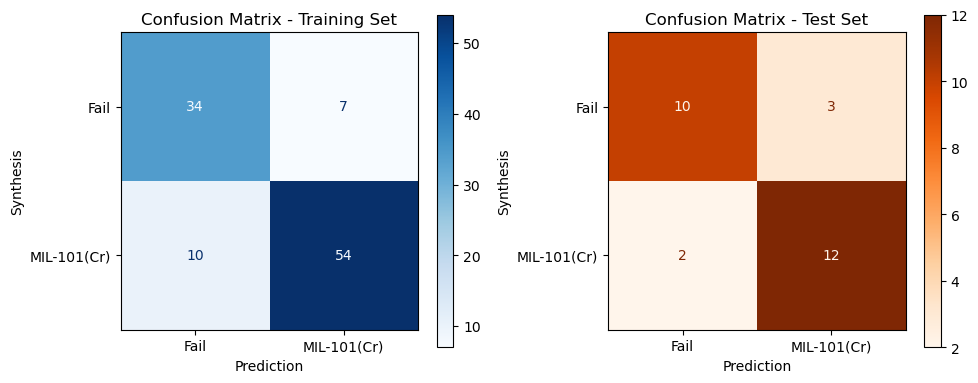

In [9]:
conf_matrix_train = confusion_matrix(y_train, y_predict_train)
conf_matrix_test = confusion_matrix(y_test, y_predict_test)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=['Fail', 'MIL-101(Cr)'])
disp_train.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Synthesis')

disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['Fail', 'MIL-101(Cr)'])
disp_test.plot(cmap=plt.cm.Oranges, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Synthesis')

plt.tight_layout()

plt.savefig('confusion_matrices_KNN.png')

plt.show()
